In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [17]:
columns=["id","cycle","op1","op2","op3","sensor1","sensor2","sensor3","sensor4","sensor5","sensor6","sensor7","sensor8",
         "sensor9","sensor10","sensor11","sensor12","sensor13","sensor14","sensor15","sensor16","sensor17","sensor18","sensor19"
         ,"sensor20","sensor21","sensor22","sensor23"]

In [18]:
train = pd.read_csv(r"C:\Users\Admin\Desktop\Chinmayee Verma\Turbofan Predictive Maintainance (NASA) (Dataset)\Dataset\train_FD001.txt", 
                    sep=" ", 
                    names=columns, 
                    engine='python')
test = pd.read_csv(r"C:\Users\Admin\Desktop\Chinmayee Verma\Turbofan Predictive Maintainance (NASA) (Dataset)\Dataset\test_FD001.txt", 
                   sep=" ", 
                   names=columns, 
                   engine='python')
test_result = pd.read_csv(r"C:\Users\Admin\Desktop\Chinmayee Verma\Turbofan Predictive Maintainance (NASA) (Dataset)\Dataset\RUL_FD001.txt", 
                          sep=" ", 
                          header=None, 
                          engine='python')

In [19]:
train.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        20631 non-null  int64  
 1   cycle     20631 non-null  int64  
 2   op1       20631 non-null  float64
 3   op2       20631 non-null  float64
 4   op3       20631 non-null  float64
 5   sensor1   20631 non-null  float64
 6   sensor2   20631 non-null  float64
 7   sensor3   20631 non-null  float64
 8   sensor4   20631 non-null  float64
 9   sensor5   20631 non-null  float64
 10  sensor6   20631 non-null  float64
 11  sensor7   20631 non-null  float64
 12  sensor8   20631 non-null  float64
 13  sensor9   20631 non-null  float64
 14  sensor10  20631 non-null  float64
 15  sensor11  20631 non-null  float64
 16  sensor12  20631 non-null  float64
 17  sensor13  20631 non-null  float64
 18  sensor14  20631 non-null  float64
 19  sensor15  20631 non-null  float64
 20  sensor16  20631 non-null  fl

In [21]:
train.describe()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000,0.0,0.0
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705,NaN,NaN
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251,NaN,NaN
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200,NaN,NaN
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800,NaN,NaN
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900,NaN,NaN
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800,NaN,NaN
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400,NaN,NaN


In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 0 to 13095
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        13096 non-null  int64  
 1   cycle     13096 non-null  int64  
 2   op1       13096 non-null  float64
 3   op2       13096 non-null  float64
 4   op3       13096 non-null  float64
 5   sensor1   13096 non-null  float64
 6   sensor2   13096 non-null  float64
 7   sensor3   13096 non-null  float64
 8   sensor4   13096 non-null  float64
 9   sensor5   13096 non-null  float64
 10  sensor6   13096 non-null  float64
 11  sensor7   13096 non-null  float64
 12  sensor8   13096 non-null  float64
 13  sensor9   13096 non-null  float64
 14  sensor10  13096 non-null  float64
 15  sensor11  13096 non-null  float64
 16  sensor12  13096 non-null  float64
 17  sensor13  13096 non-null  float64
 18  sensor14  13096 non-null  float64
 19  sensor15  13096 non-null  float64
 20  sensor16  13096 non-null  fl

In [23]:
test_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    int64  
 1   1       0 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [24]:
train.head()
print('Unique ID: ',train.id.unique())

Unique ID:  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]


In [ ]:

numeric_cols = train.select_dtypes(include=['float64', 'int']).columns

# Apply IQR to cap outliers for each numeric column
for col in numeric_cols:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    train[col] = train[col].clip(lower_bound, upper_bound)

train.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [26]:
#normalisation and feature scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train[numeric_cols] = scaler.fit_transform(train[numeric_cols])

train.head()

c:\Users\Admin\anaconda3\envs\ChinmayeeENV\Lib\site-packages\sklearn\utils\_array_api.py:695: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
c:\Users\Admin\anaconda3\envs\ChinmayeeENV\Lib\site-packages\sklearn\utils\_array_api.py:712: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23
0,0.0,0.000000,0.441667,0.166667,0.0,0.0,0.187963,0.480911,0.338920,0.0,...,0.464197,0.397682,0.0,0.375,0.0,0.0,0.735,0.715000,NaN,NaN
1,0.0,0.003215,0.658333,0.250000,0.0,0.0,0.310185,0.546182,0.390990,0.0,...,0.345876,0.458333,0.0,0.375,0.0,0.0,0.675,0.722931,NaN,NaN
2,0.0,0.006431,0.141667,0.750000,0.0,0.0,0.384259,0.428264,0.412720,0.0,...,0.374751,0.389300,0.0,0.125,0.0,0.0,0.625,0.586034,NaN,NaN
3,0.0,0.009646,0.558333,0.500000,0.0,0.0,0.384259,0.268165,0.364955,0.0,...,0.384708,0.144724,0.0,0.375,0.0,0.0,0.555,0.637241,NaN,NaN
4,0.0,0.012862,0.341667,0.333333,0.0,0.0,0.391667,0.270012,0.454131,0.0,...,0.384210,0.446499,0.0,0.500,0.0,0.0,0.575,0.689828,NaN,NaN


In [27]:
#Calculating Remaining Useful Life (RUL)
rul_train = train.groupby('id')['cycle'].max().reset_index()
rul_train.columns = ['id', 'MaxCycle']

train = train.merge(rul_train, on='id')
train['RUL'] = train['MaxCycle'] - train['cycle']

train.drop(columns=['MaxCycle'], inplace=True)

train.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23,RUL
0,0.0,0.000000,0.441667,0.166667,0.0,0.0,0.187963,0.480911,0.338920,0.0,...,0.397682,0.0,0.375,0.0,0.0,0.735,0.715000,NaN,NaN,0.614148
1,0.0,0.003215,0.658333,0.250000,0.0,0.0,0.310185,0.546182,0.390990,0.0,...,0.458333,0.0,0.375,0.0,0.0,0.675,0.722931,NaN,NaN,0.610932
2,0.0,0.006431,0.141667,0.750000,0.0,0.0,0.384259,0.428264,0.412720,0.0,...,0.389300,0.0,0.125,0.0,0.0,0.625,0.586034,NaN,NaN,0.607717
3,0.0,0.009646,0.558333,0.500000,0.0,0.0,0.384259,0.268165,0.364955,0.0,...,0.144724,0.0,0.375,0.0,0.0,0.555,0.637241,NaN,NaN,0.604502
4,0.0,0.012862,0.341667,0.333333,0.0,0.0,0.391667,0.270012,0.454131,0.0,...,0.446499,0.0,0.500,0.0,0.0,0.575,0.689828,NaN,NaN,0.601286


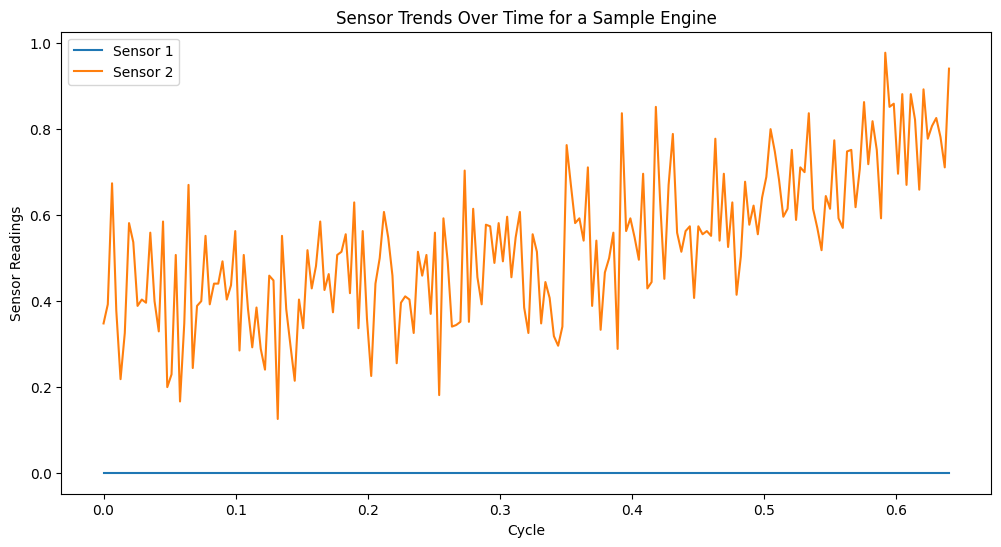

In [28]:
import matplotlib.pyplot as plt

sample_engine = train[train['id'] == 1] 

plt.figure(figsize=(12, 6))
plt.plot(sample_engine['cycle'], sample_engine['sensor1'], label='Sensor 1')
plt.plot(sample_engine['cycle'], sample_engine['sensor2'], label='Sensor 2')
plt.xlabel('Cycle')
plt.ylabel('Sensor Readings')
plt.title('Sensor Trends Over Time for a Sample Engine')
plt.legend()
plt.show()

In [29]:
#Calculate correlations between each sensor and RUL
correlations = train.corr()['RUL'].drop('RUL')
important_features = correlations[correlations.abs() > 0.1] 

#features with high correlation to RUL
print("Important Features for Predicting RUL:")
print(important_features)

Important Features for Predicting RUL:
cycle      -0.773530
sensor2    -0.616173
sensor3    -0.594342
sensor4    -0.690575
sensor7     0.668209
sensor8    -0.574831
sensor9    -0.370895
sensor11   -0.708203
sensor12    0.683705
sensor13   -0.574488
sensor14   -0.254649
sensor15   -0.652676
sensor17   -0.616318
sensor20    0.640884
sensor21    0.645890
Name: RUL, dtype: float64


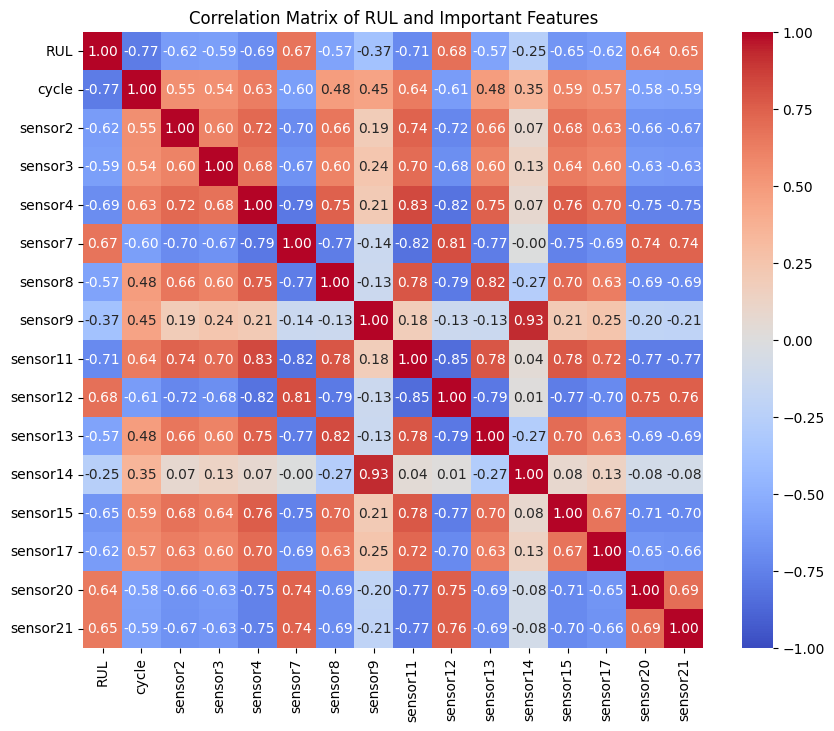

In [30]:
#visualisation with correlation matrix 
important_feature_names = important_features.index.tolist()
correlation_data = train[['RUL'] + important_feature_names].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1, cbar=True)
plt.title("Correlation Matrix of RUL and Important Features")
plt.show()